In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.cluster import hierarchy as hc

matplotlib.rcParams['figure.figsize'] = (12, 12)

aarhus_apartments = pd.read_csv('aarhus_apartments.csv')

In [12]:
aarhus_apartments.corr()

,zip_code,price,rooms,size,build_year,latitude,longitude
zip_code,1.000000,-0.145322,-0.129532,-0.146553,0.010671,0.622659,0.244359
price,-0.145322,1.000000,0.416454,0.567506,-0.075140,0.004019,0.181975
rooms,-0.129532,0.416454,1.000000,0.795884,-0.127959,-0.050889,0.081551
size,-0.146553,0.567506,0.795884,1.000000,-0.064468,0.003794,0.225137
build_year,0.010671,-0.075140,-0.127959,-0.064468,1.000000,0.061176,0.062275
latitude,0.622659,0.004019,-0.050889,0.003794,0.061176,1.000000,0.534906
longitude,0.244359,0.181975,0.081551,0.225137,0.062275,0.534906,1.000000


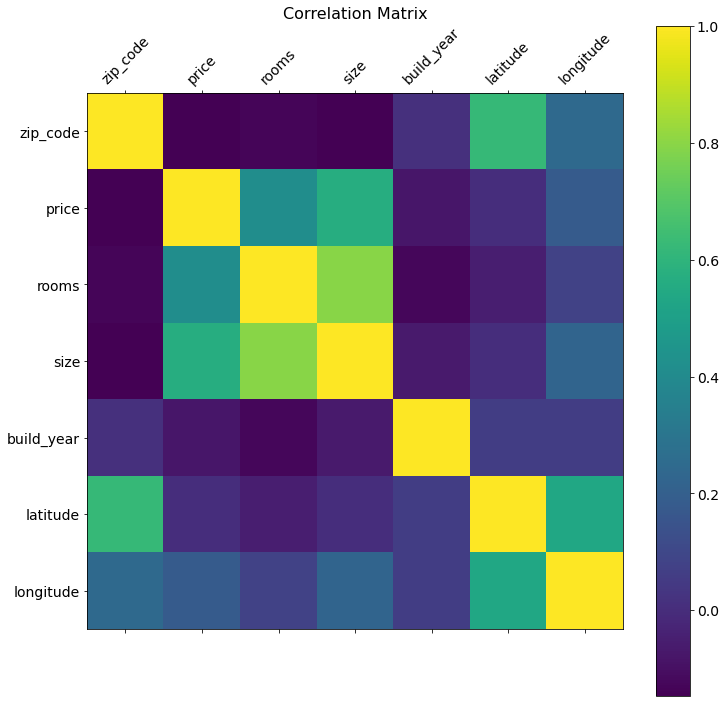

In [8]:
def correlation_matrix(df):
    """Plots the correlation matrix.
    
    Args:
        df (pd.DataFrame): A pandas DataFrame.
    """
    corr = df.corr()
    f = plt.figure()
    plt.matshow(corr, fignum=f.number)
    plt.xticks(
        range(len(corr.columns)),
        corr.columns,
        fontsize=14,
        rotation=45,
    )
    plt.yticks(
        range(len(corr.columns)),
        corr.columns,
        fontsize=14,
    )
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()
    
correlation_matrix(aarhus_apartments)

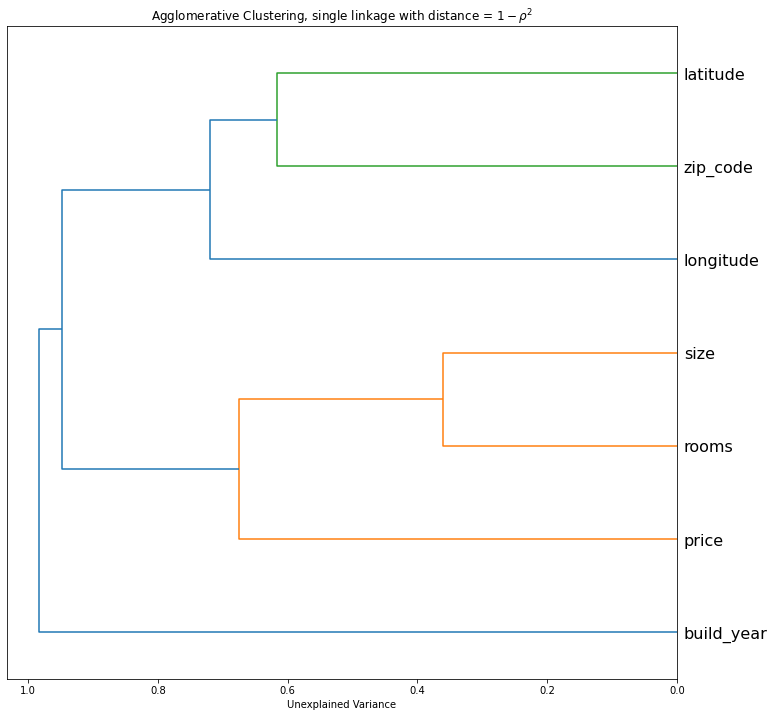

In [11]:
def correlation_dendogram(df, method='single'):
    """Used to plot the dendogram from a correlation matrix.
    
    1 - corr ** 2 can be interpreted as the unexplained variance
    from a linear model between a bivariate distribution (X, Y).
    This can be interpreted as a distance matrix
    
    Args:
        df (pd.DataFrame):
    """
    plt.figure()
    corr = df.corr()
    corr = np.round(corr, 2)
    distance_matrix = 1 - corr ** 2
    corr_condensed = hc.distance.squareform(distance_matrix)
    z = hc.linkage(corr_condensed, method=method)
    hc.dendrogram(
        z,
        labels=corr.columns,
        orientation='left',
        leaf_font_size=16,
    )
    plt.title(
        "Agglomerative Clustering, single linkage with "
        "distance = $1 - \\rho^2$"
    )
    plt.xlabel(
        "Unexplained Variance"
    )
    plt.show()
    
correlation_dendogram(aarhus_apartments)